In [2]:
""""
database:
    dict: {name --> [authorized:boolean, [descriptor vectors]]}
    update database format from week2
    only those allowed to drive
    
def isAuthorized(descriptor vector):
    return True or False  
    
def addAuthorized(descriptor vector):
    adds person to database
"""


'\ndatabase:\n    dict: {name --> [authorized:boolean, [descriptor vectors]]}\n    \ndef isAuthorized(descriptor vector):\n    return True or False  \n    \ndef addAuthorized(descriptor vector):\n    adds person to database\n'

In [1]:
def isAuthorized(vector, iden_threshold):
    """
    Queries the database for matches with the provided vector and identification threshold
    Parameters
    ----------
    vector : numpy.ndarray, shape-(512,)
        Descriptor vector for the input face
    iden_threshold : float
        The minimum cosine distance necessary for the function to consider two vectors a match
    Returns
    -------
    string
        The name of the profile that matches the provided vector most closely. Will return "unknown" if no match is found.
    """
    profiles_dict = load_profiles_from_file()
    
    mindist = 2
    for name, profile in profiles_dict.items():
        curdist = cos_distance(profile.avg_vector().reshape(1,-1),vector.reshape(1,-1))
        if  curdist < mindist:
            mindist = curdist
            minname = name
    if mindist<iden_threshold:
        return minname + " AUTHORIZED"
    else:
        return "UNAUTHORIZED"

In [2]:
#resets database
from CogBook import *
import skimage.io as io
#from PIL import Image
from shutil import move

import pickle
import numpy as np
import os



# assign directory
directory = r'C:\Users\ejian\CogWorks-2022-Gausslien-Final-Capstone\Car Cop\Images'
loadedDir = r'C:\Users\ejian\CogWorks-2022-Gausslien-Final-Capstone\Car Cop\Loaded_Images'

# iterate over files in
# that directory
fileList = []

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    destination = os.path.join(loadedDir, filename)
    
    if os.path.isfile(filepath):
        fileList.append((filepath, filename, destination))


profileDB = load_profiles_from_file()

for fileInfo in fileList:
    print(fileInfo[1])

    name, number = fileInfo[1].split(".")[0].split("_")
    

    img_data = io.imread(str(fileInfo[0]))

    if img_data.shape[-1] == 4:
        img_data = img_data[..., :-1]
    
    # img_data = np.array(Image.open(fileInfo[0]))[:,:,:-1]
    descriptors = get_descriptors(img_data)
    
    save_vector_to_profile(profileDB, name, descriptors[0])
    
    move(fileInfo[0], fileInfo[2])
    
save_profiles_to_file(profileDB)

Upload (u) or take a photo (t)? t


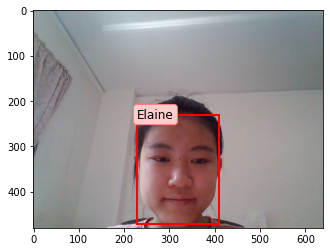

elaine AUTHORIZED


In [3]:
#main testing
from CogBook import *
from CogBook import label_faces
from PIL import Image
from camera import take_picture
import numpy as np
import skimage.io as io

while True:
    choice = input("Upload (u) or take a photo (t)? ")
    
    if choice=="u":
        filepath = input("Filepath: ")
        # pic = np.array(Image.open(filepath))[:,:,:3]
        # shape-(Height, Width, Color)
        pic = io.imread(str(filepath))
        if pic.shape[-1] == 4:
            # Image is RGBA, where A is alpha -> transparency
            # Must make image RGB.
            pic = pic[..., :-1]  # png -> RGB
        label_faces(pic)
        break
    elif choice=="t":
        pic = take_picture()
        label_faces(pic)
        descrip = get_descriptors(pic)[0]
        authorized = isAuthorized(descrip, 0.5)
        print(authorized)
        if authorized == "UNAUTHORIZED":
            name = input("Enter name")
            save_vector_to_profile(profileDB, name, descrip)
        break
    else:
        print("Invalid input. Try again. ")

elaine_0.png
elaine_1.jpg


In [4]:
profiles_dict = load_profiles_from_file()
print(profiles_dict)

{'elaine': <CogBook.profile_functionality.Profile object at 0x00000184FBCC6760>}
